<a href="https://colab.research.google.com/github/SedyaPrograms/Tutorial/blob/main/AI%20and%20machine%20learning/%D0%9C%D0%B0%D1%88%D0%B8%D0%BD%D0%BD%D0%BE%D0%B5_%D0%BE%D0%B1%D1%83%D1%87%D0%B5%D0%BD%D0%B8%D0%B5_%D0%93%D1%80%D0%B0%D0%B4%D0%B8%D0%B5%D0%BD%D1%82%D0%BD%D1%8B%D0%B9_%D1%81%D0%BF%D1%83%D1%81%D0%BA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* # Градиентный спуск


* #### Минимизация квадратичной функции

In [ ]:
# 1. Выбираем исходную точку
# 2. Считаем градиент в этой точке
# 3. Делаем шаг в сторону антиградиента с learning rate = lr
#  * Повторяем 2 и 3 шаги, пока не выполнится одно из условий:
#  * Количество итераций превысило максимальное
#  * Размер шага имеет довольно маленькое значение, не меняется на протяжении многих итераций

import numpy as np

def f(x):
    return x ** 2

def f_grad(x):
    return 2 * x

def gradient_descent(x_init, n_iterations=10, lr=0.001, tol=1e-6):
    x = x_init
    x_history = [x]
    iter = 0

    while iter < n_iterations:
        diff = lr * f_grad(x)
        x = x - diff

        x_history.append(x)
        iter += 1

        if np.abs(diff) < tol:
            break
    
    return np.array(x_history)

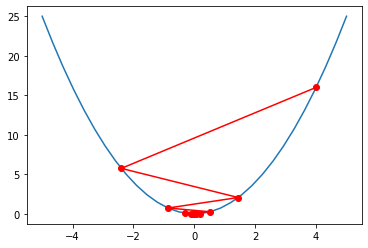

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x_history = gradient_descent(x_init=4, n_iterations=100, lr=0.8)

x = np.linspace(-5, 5, 30)

plt.plot(x, f(x))
plt.plot(x_history, f(x_history), 'ro-')

* #### Линейная регрессия

In [ ]:
def loss(y_true, y_pred):
    return ((y_true - y_pred) ** 2).sum() / len(y_true)

def loss_grad(x, y_true, w0, w1):
    grad_w0 = -2.0 * np.sum(y_true - (w0 + w1 * x)) / len(y_true)
    grad_w1 = -2.0 * np.sum((y_true - (w0 + w1 * x)) * x) / len(y_true)
    return grad_w0, grad_w1


def gradient_descent(x, y, epochs=10, lr=0.001):
    w0 = 0.0
    w1 = 0.0
    mse_history = [loss(y, w0 + w1 * x)]
    epoch = 0
    while epoch < epochs:

        grad_w0, grad_w1 = loss_grad(x, y, w0, w1)
        y_pred = w0 + w1 * x

        mse = loss(y, y_pred)
        mse_history.append(mse)

        w0 = w0 - lr * grad_w0
        w1 = w1 - lr * grad_w1

        if epoch % 30 == 0:
            print(mse)
            plt.plot(x, y, 'bo')
            plt.plot(x, w0 + w1 * x, 'r-')
            plt.pause(0.001)

        epoch += 1
    return w0, w1, mse_history

5074.892100281431


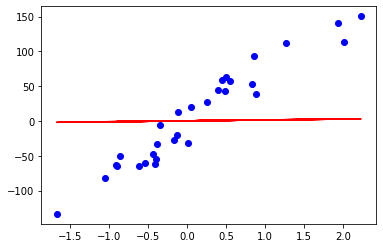

2037.6327604880494


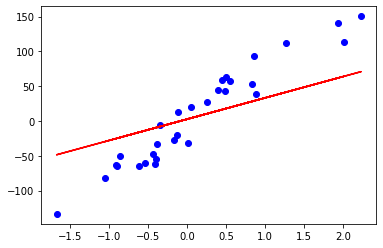

969.9874266544182


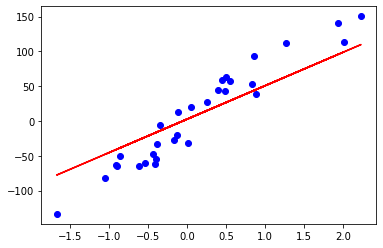

585.3052177301811


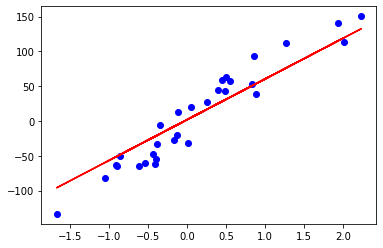

443.8677136454405


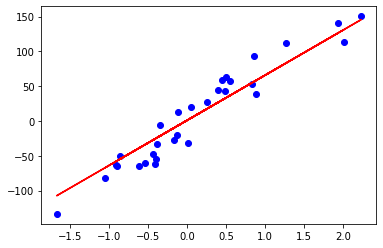

391.03077827176264


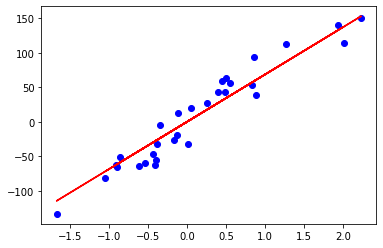

371.05178475715496


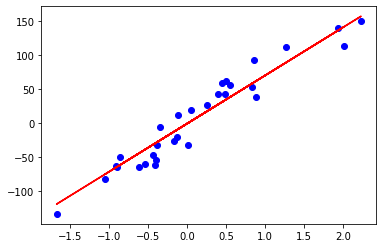

363.4288808903958


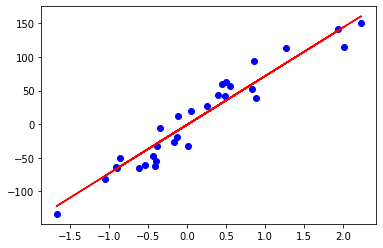

360.5012214498847


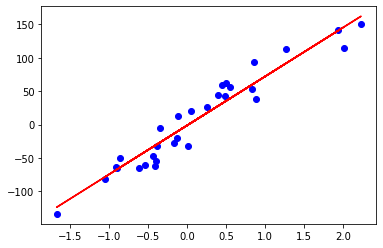

359.3714916761731


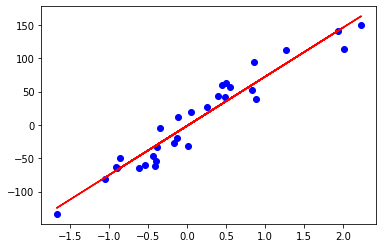

358.93407754845964


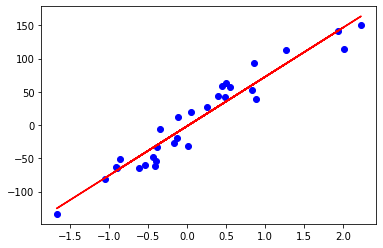

358.7643127452858


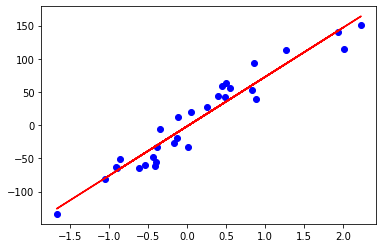

358.69831443781186


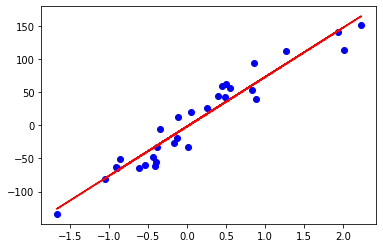

358.6726264163928


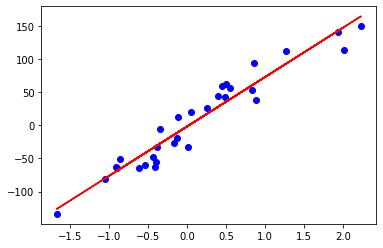

358.6626197921572


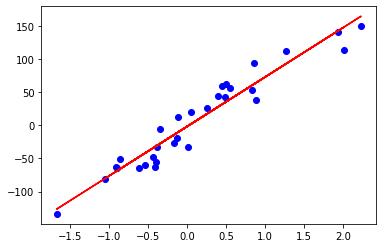

358.65871951397565


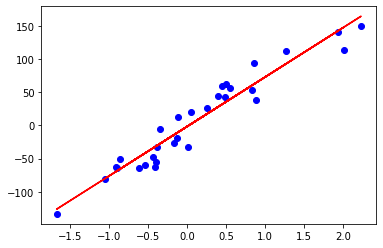

358.6571986901989


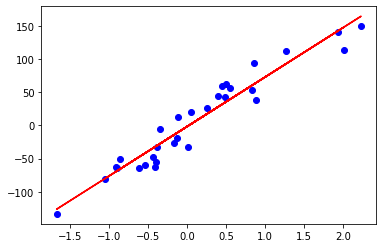

358.65660551288715


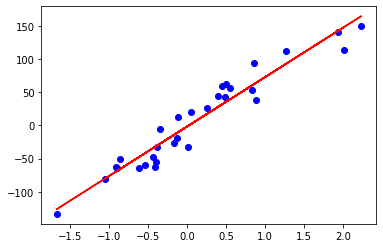

358.65637410643023


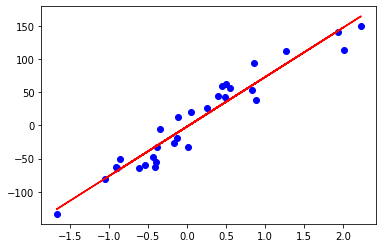

358.6562838192944


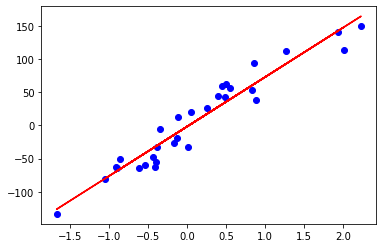

358.65624858888316


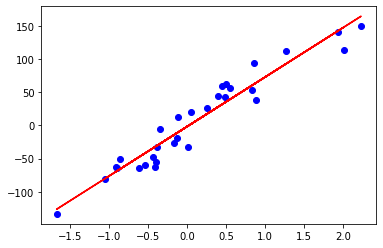

358.6562348409179


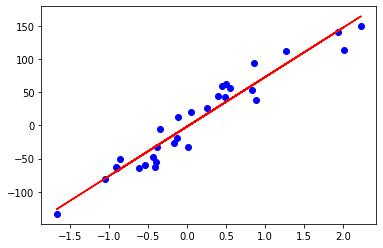

358.65622947580033


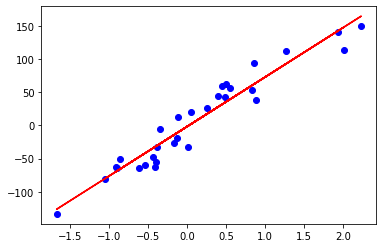

358.65622738200574


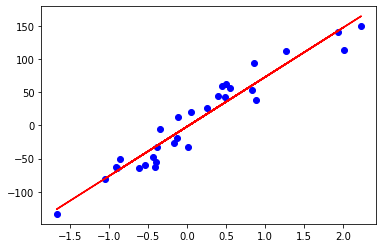

358.65622656486147


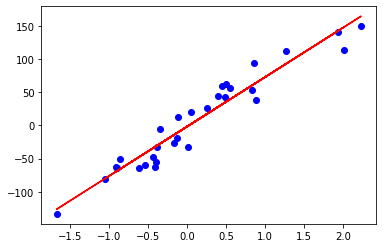

358.6562262459501


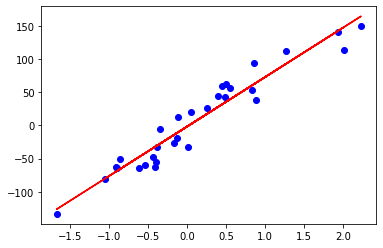

358.65622612148553


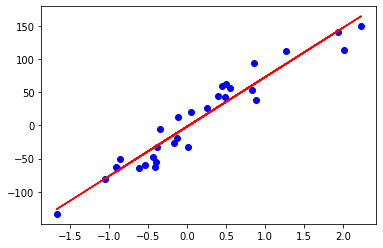

358.6562260729092


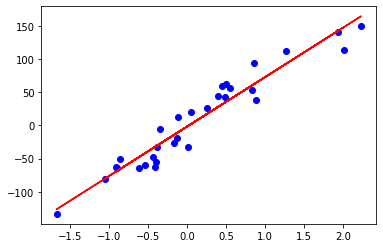

358.6562260539504


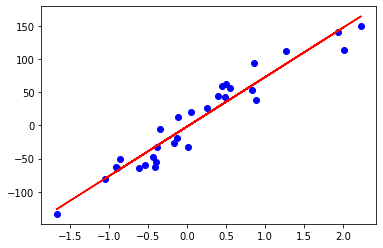

358.656226046551


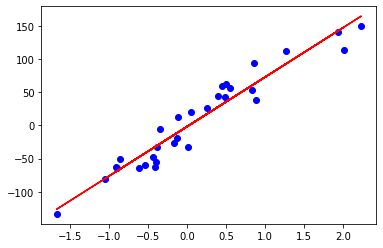

358.6562260436633


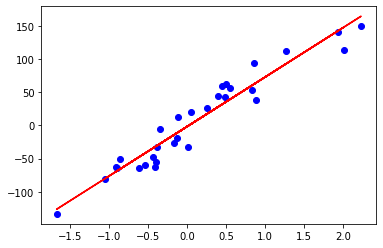

358.6562260425362


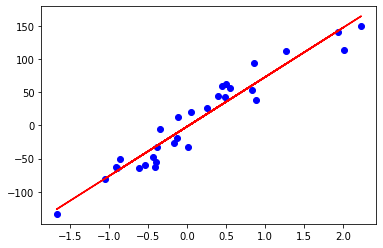

358.65622604209636


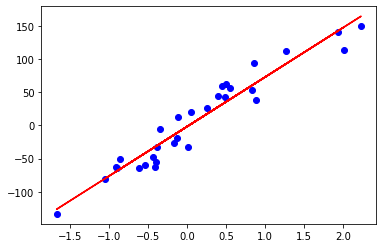

358.6562260419247


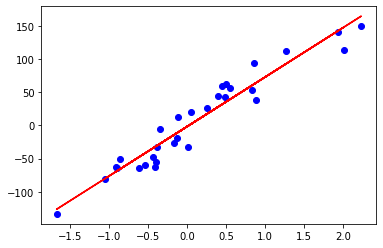

(-1.9113402659948362, 74.66812878022895)

In [ ]:
from sklearn.datasets import make_regression

x, y = make_regression(n_samples=30, n_features=1, noise=20, random_state=43)

x = x.reshape(-1)

w0, w1, mse_history = gradient_descent(x, y, epochs=1000, lr=0.01)
w0, w1

Text(0, 0.5, 'Loss (MSE)')

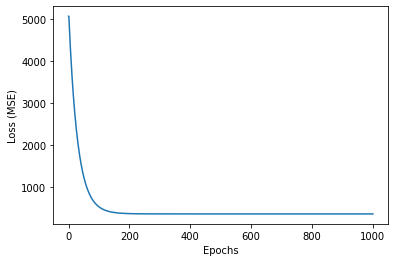

In [ ]:
plt.plot(np.arange(0, len(mse_history)), mse_history)
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')

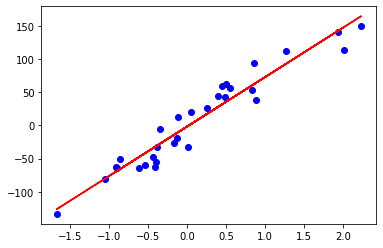

In [ ]:
plt.plot(x, y, 'bo')
plt.plot(x, w0 + w1 * x, 'r')

In [ ]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(x.reshape(-1, 1), y)

LinearRegression()

In [ ]:
linreg.intercept_, linreg.coef_

(-1.9113453310484996, array([74.66813759]))

In [ ]:
(-1.9113453310484996, 74.66813759000000)
(-1.9113402659948362, 74.66812878022895)

* #### Стохастический градиентный спуск

In [ ]:
def loss(y_true, y_pred):
    return ((y_true - y_pred) ** 2).sum() / (2 * len(y_true))

def loss_grad(x, y_true, w0, w1):
    grad_w0 = -2.0 * np.sum(y_true - (w0 + w1 * x)) / len(y_true)
    grad_w1 = -2.0 * np.sum((y_true - (w0 + w1 * x)) * x) / len(y_true) + alpha * w
    return grad_w0, grad_w1


def SGD(x, y, epochs=10, lr=0.001, batch_size=1):
    w0 = 0.0
    w1 = 0.0
    
    mse_history = [loss(y, w0 + w1 * x)]

    epoch = 0
    while epoch < epochs:
        indicies = np.random.randint(0, len(y), size=(batch_size,))
        x_batch, y_batch = x[indicies], y[indicies]

        grad_w0, grad_w1 = loss_grad(x_batch, y_batch, w0, w1)

        w0 = w0 - lr * grad_w0
        w1 = w1 - lr * grad_w1
        mse_history.append(loss(y, w0 + w1 * x))

        epoch += 1
    return w0, w1, mse_history

In [ ]:
x, y = make_regression(n_samples=1000, n_features=1, noise=40, random_state=43)
x = x.reshape(-1)
w0, w1, mse_history = SGD(x, y, epochs=1000, batch_size=128)

Text(0, 0.5, 'Loss (MSE)')

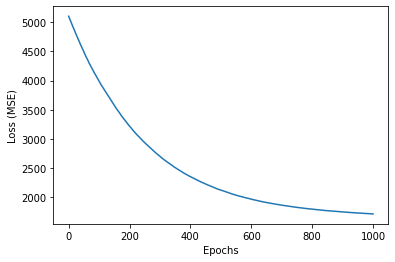

In [ ]:
plt.plot(np.arange(0, len(mse_history)), mse_history)
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')

Text(0, 0.5, 'Loss (MSE)')

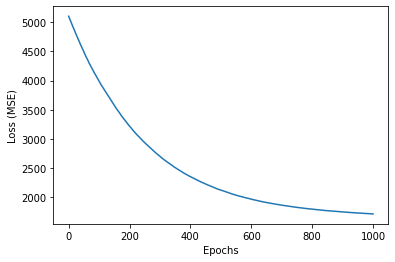

In [ ]:
plt.plot(np.arange(0, len(mse_history)), mse_history)
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')

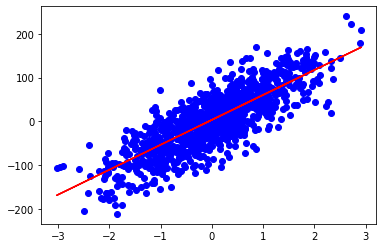

In [ ]:
plt.plot(x, y, 'bo')
plt.plot(x, w0 + w1 * x, 'r')

In [ ]:
from sklearn.linear_model import SGDRegressor


regressor = SGDRegressor(max_iter=1000)

regressor.fit(x.reshape(-1, 1), y)

SGDRegressor()

In [ ]:
regressor.coef_, regressor.intercept_, regressor.n_iter_

(array([59.32439964]), array([1.30733903]), 24)